#Credit Card Fraud Detection

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv("/content/fraudTrain.csv")
test_df = pd.read_csv("/content/fraudTest.csv")

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [4]:
train_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
678172,678172,2019-10-16 04:13:31,4671727014157745,"fraud_Okuneva, Schneider and Rau",shopping_pos,114.77,Kenneth,Edwards,M,3653 Ryan Crossroad,...,40.8618,-85.6067,2304,Retail banker,1955-07-25,431fa69e377c1e98345a365d776e6efc,1350360811,41.602304,-86.454245,0.0
678173,678173,2019-10-16 04:14:56,30560609640617,fraud_Auer-Mosciski,grocery_pos,137.55,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,3fc07740cd967d18e2183b77679f3976,1350360896,40.659303,-90.916429,0.0
678174,678174,2019-10-16 04:16:50,343472729187663,fraud_Torp-Labadie,gas_transport,72.35,Gloria,Wallace,F,234 Bridges Wells Apt. 389,...,43.6849,-71.2551,1368,"Optician, dispensing",1971-08-05,403a2e71cf30e0a28c2aac2e671b5d36,1350361010,43.872635,-71.837000,0.0
678175,678175,2019-10-16 04:18:33,503848303379,fraud_Kuhic Inc,grocery_pos,71.05,Gregory,Wallace,M,27203 Darrell Landing,...,26.5290,-82.0916,3776,Sport and exercise psychologist,1976-09-12,f27e33903f7dfefe75e512b1bd96daf9,1350361113,26.256438,-82.354349,0.0
678176,678176,2019-10-16 04:18:58,5152054598359927,"fraud_Bernier, Streich and Jewess",grocery_net,51.34,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581,Biomedical scientist,1972-09-12,412048e30eb991ef28df41dc2801eed7,1350361138,NaN,NaN,NaN


In [5]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678177 entries, 0 to 678176
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             678177 non-null  int64  
 1   trans_date_trans_time  678177 non-null  object 
 2   cc_num                 678177 non-null  int64  
 3   merchant               678177 non-null  object 
 4   category               678177 non-null  object 
 5   amt                    678177 non-null  float64
 6   first                  678177 non-null  object 
 7   last                   678177 non-null  object 
 8   gender                 678177 non-null  object 
 9   street                 678177 non-null  object 
 10  city                   678177 non-null  object 
 11  state                  678177 non-null  object 
 12  zip                    678177 non-null  int64  
 13  lat                    678177 non-null  float64
 14  long                   678177 non-nu

In [7]:
print(train_df.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  678177.000000  6.781770e+05  678177.000000  678177.000000   
mean   339088.000000  4.168021e+17      70.247084   48780.098398   
std    195772.981092  1.308379e+18     159.082983   26906.406063   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    169544.000000  1.800365e+14       9.640000   26041.000000   
50%    339088.000000  3.520550e+15      47.400000   48174.000000   
75%    508632.000000  4.642255e+15      83.020000   72011.000000   
max    678176.000000  4.992346e+18   26544.120000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  678177.000000  678177.000000  6.781770e+05  6.781770e+05   
mean       38.536305     -90.217418  8.899909e+04  1.338730e+09   
std         5.073584      13.764488  3.025300e+05  6.839524e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.430000e+02  1

In [8]:
print(train_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


### Plotting Distribution of Fraudlent Transactions

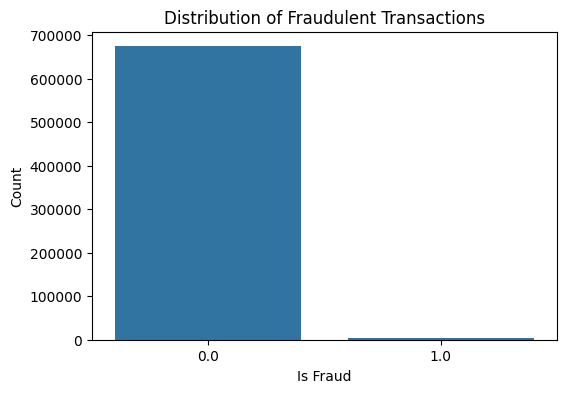

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

### Visualize the correlation matrix

<ipython-input-10-5cb4b2041f7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


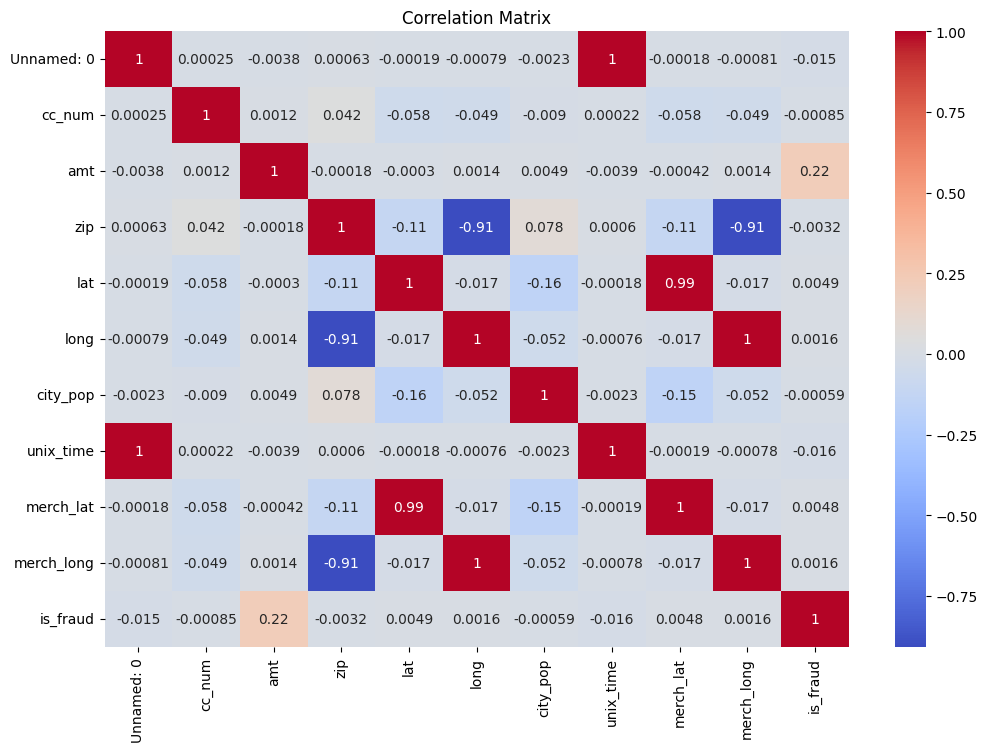

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Visualising Few Columns

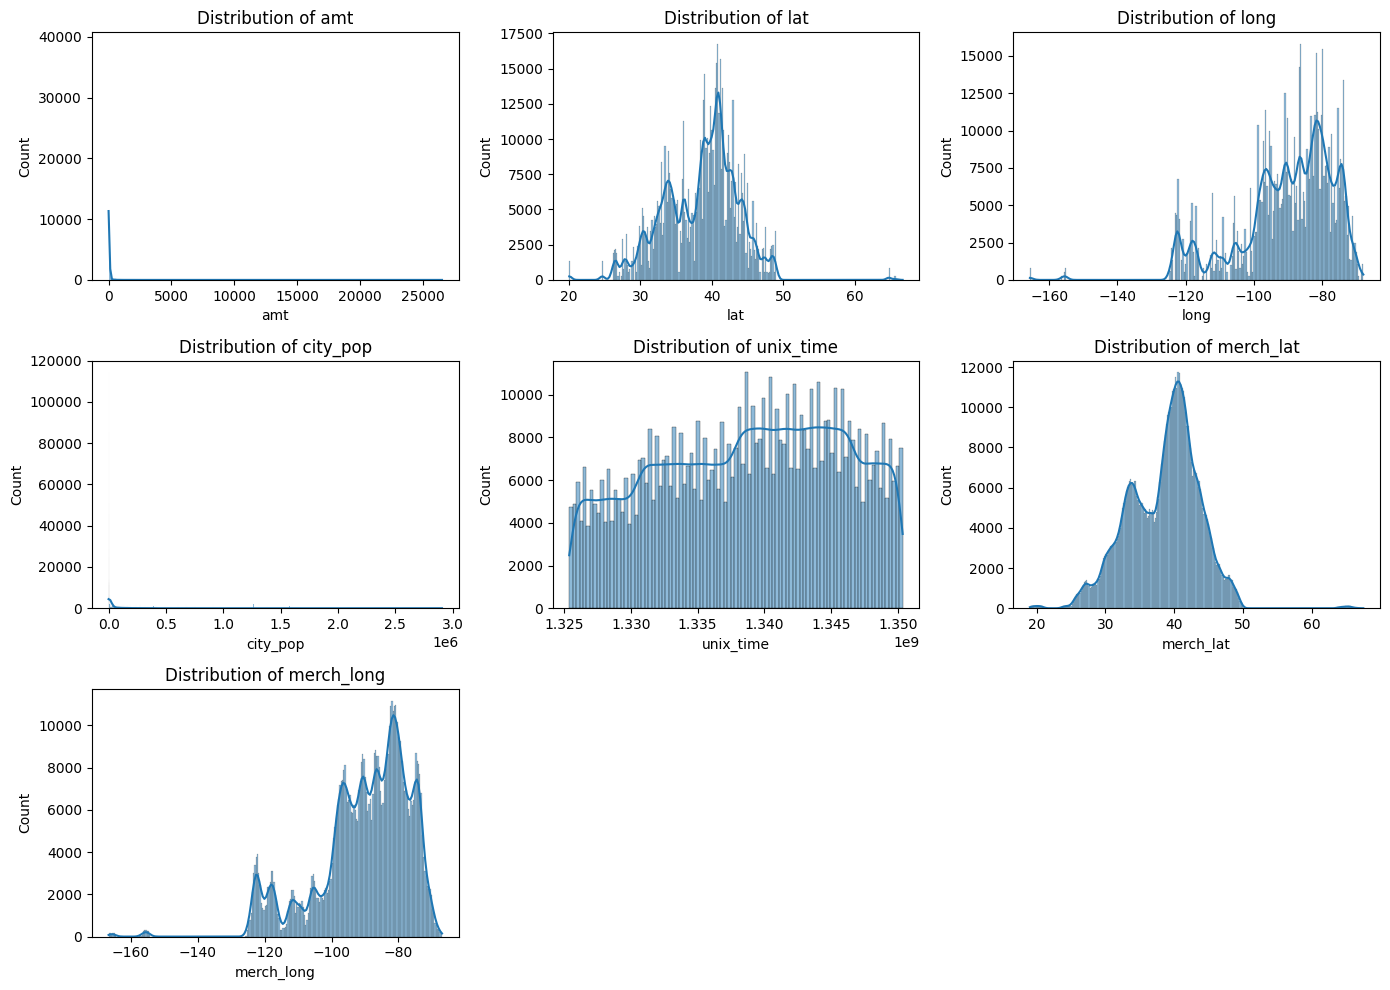

In [11]:
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

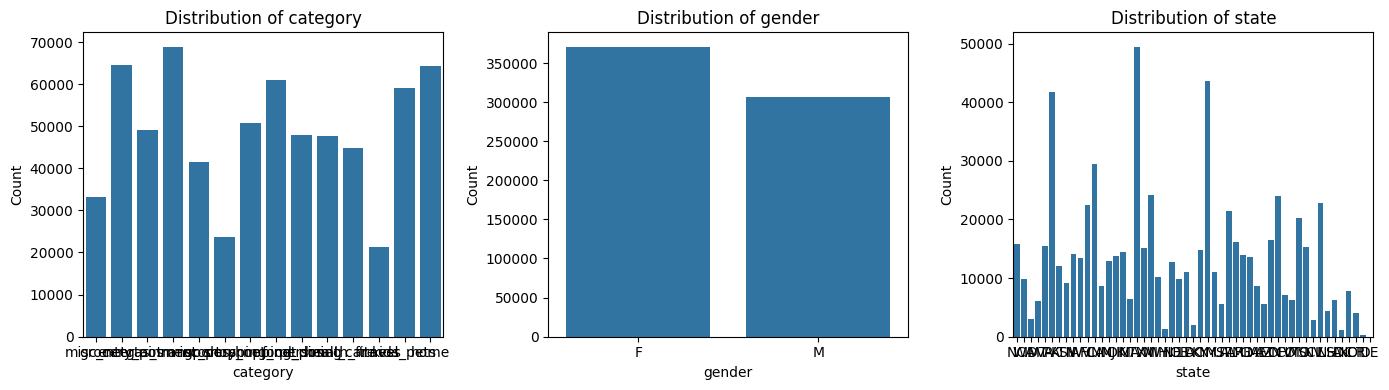

In [12]:
categorical_features = ['category', 'gender', 'state']
plt.figure(figsize=(14, 4))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Remove rows with missing values in specified columns

In [13]:
columns_to_check = ['amt', 'city_pop', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long']
data_cleaned = train_df.dropna(subset=columns_to_check)
print(data_cleaned.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [14]:
features = ['amt', 'city_pop', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long']

In [15]:
X_train = train_df[features]
y_train = train_df['is_fraud']
X_test = test_df[features]
y_test = test_df['is_fraud']

### Encode the target variable

In [16]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### Standardize the data

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Fitting

In [18]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predicting Values


In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.996109544571987
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.10      0.17      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.55      0.58    555719
weighted avg       0.99      1.00      0.99    555719



### Plotting Confusion Matrix

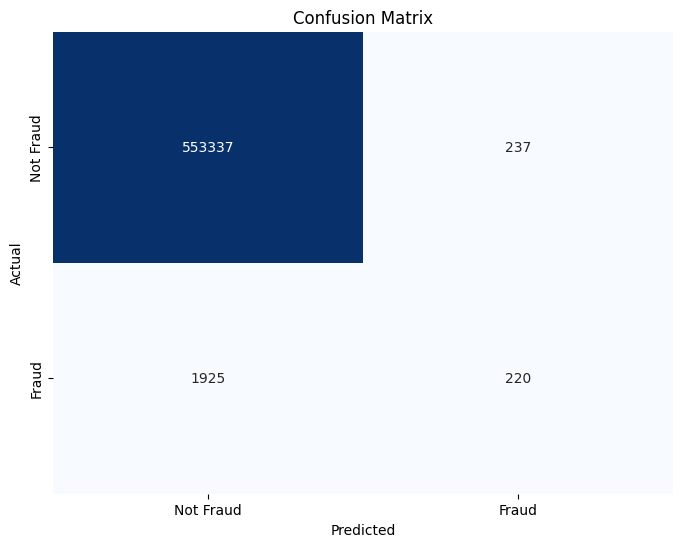

In [21]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Fraud', 'Fraud'])
plt.show()